In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# 1. Understanding and explaining the data set.

### Import CSV

In [58]:
df= pd.read_csv('./winequality-red.csv',sep=';')

In [59]:
df.shape

(1599, 12)

In [60]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Confirm data types

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Confirm Data Stats & Observe outliers, if any

In [62]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Let's focus on quality of wines

In [63]:
quality= df['quality']

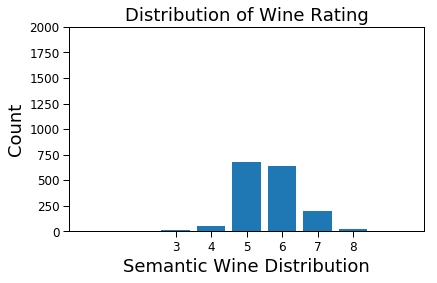

In [64]:
#Visulization of distribution of data points across rows and columns
labels, counts = np.unique(quality, return_counts=True)
plt.bar(labels, counts, align='center')

plt.grid(False)
plt.title('Distribution of Wine Rating', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Semantic Wine Distribution', fontsize=18)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rc('xtick', labelsize=12)     
plt.rc('ytick', labelsize=12)
plt.tight_layout()

ax = plt.gca()
ax.set_xticks(labels)
ax.set_facecolor('xkcd:white')
ax.tick_params(direction='out', length=6, width=1, grid_alpha=0.5)
ax.set_xlim(0, 10)
ax.set_ylim(0, 2000)

plt.show()

### Let's observe relation between quality and other variables. This would give us better idea about performance selection

### Quality Vs Fixed Acidity

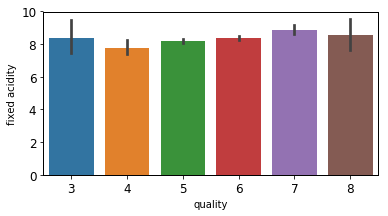

In [65]:
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

### Quality Vs Volatile Acidity

#### Based on observed results there might be a good co-relation betweeen Quality and Volatile Acidity. 

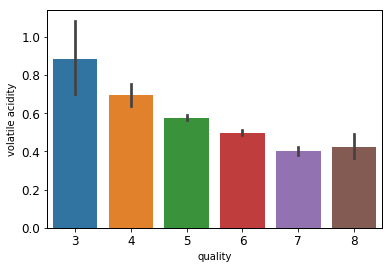

In [66]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

### Composition of citric acid go higher as we go higher in the quality of the wine

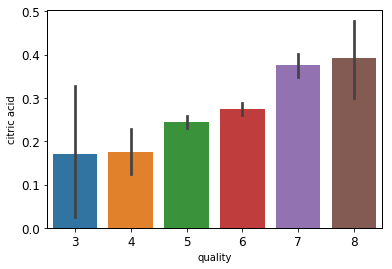

In [67]:
sns.barplot(x = 'quality', y = 'citric acid', data = df)

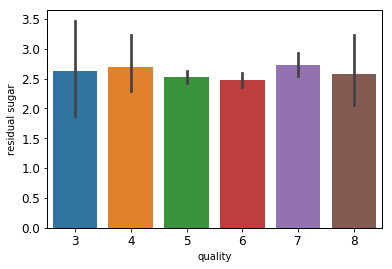

In [68]:
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

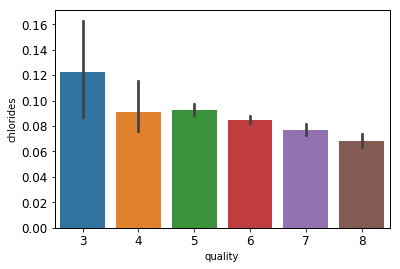

In [69]:
sns.barplot(x = 'quality', y = 'chlorides', data = df)

### Sulphates level goes higher with the quality of wine

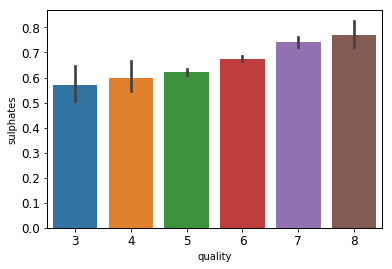

In [26]:
sns.barplot(x = 'quality', y = 'sulphates', data = df)

# 2. Processing data, cleaning up.

In [28]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [30]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [32]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [33]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

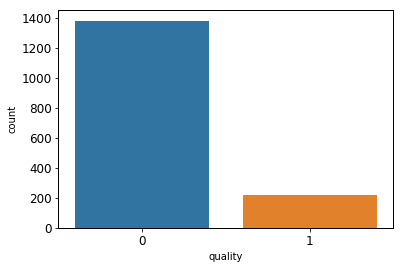

In [34]:
sns.countplot(df['quality'])

# 3. Divid data into a training and test set.

In [35]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop('quality', axis = 1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [37]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# 4. Choosing the relevant algorithm.

### A. Random Forest Classifier

In [41]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [42]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       273
           1       0.64      0.34      0.44        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.77      0.65      0.69       320
weighted avg       0.86      0.88      0.86       320



In [43]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 31  16]]


### B. Stochastic Gradient Descent Classifier

In [44]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

/Users/sapatil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [45]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       273
           1       0.70      0.15      0.25        47

   micro avg       0.87      0.87      0.87       320
   macro avg       0.79      0.57      0.59       320
weighted avg       0.85      0.87      0.83       320



84% accuracy using stochastic gradient descent classifier

In [48]:
print(confusion_matrix(y_test, pred_sgd))

[[270   3]
 [ 40   7]]


### C. SVM ( Support Vector Machine Algo)

In [50]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

Support vector classifier gets 86%

# 6. Evaluating your learning performance.

### Let's try to increase our accuracy of models

In [52]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [54]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [55]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

   micro avg       0.90      0.90      0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



SVC improves from 86% to 90% using Grid Search CV
Cross Validation Score for random forest and SGD

### Now lets try to do some evaluation for random forest model using cross validation.

In [56]:
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9132320374015748

Random forest accuracy increases from 87% to 91 % using cross validation score